# Goal: Data Cleaning

In [113]:
""" 
Goal: Data Cleaning
Author: Rudra Prasad Bhuyan
"""

' \nGoal: Data Cleaning\nAuthor: Rudra Prasad Bhuyan\n'

In [114]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [116]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data\lev-03_merged.parquet"

pdf = pl.read_parquet(path)

In [117]:
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('HH_Size_FDQ', Float64),
        ('Engaged_in_Economic_Activity_Las', String),
        ('NCO_2015_Code', String),
        ('NIC_2008_Code', String),
        ('Max_Income_Activity', String),
        ('Self_Employment_Source_Sector', String),
        ('Regular_Wage_Source_Sector', String),
        ('Casual_Labour_Source_Sector', String),
        ('Household_Type', String),
        ('Religion_o

In [118]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

In [119]:
mp_data['State'].unique()

State
str
"""23"""


# Break down all useful variables into separate group

In [120]:
lev_03_hh = ['FSU_Serial_No', 'HH_Size_FDQ', 'Household_Type',
            'Religion_of_HH_Head', 'Land_Ownership',
            'Type_of_Land_Owned','Total_Area_Land_Owned_Acres',
            'Energy_Source_Cooking', 'Energy_Source_Lighting',
            'Dwelling_Unit_Exists', 'Type_of_Dwelling_Unit',
            'Rent_Rate_Available_Rural', 'Multiplier']

lev_03_fin = [
    'Self_Employment_Source_Sector','Regular_Wage_Source_Sector',
    'Casual_Labour_Source_Sector', 'Ration_Card_Type']

lev_03_occupation = [
    'Engaged_in_Economic_Activity_Las',	'Max_Income_Activity']

lev_03_scheme = ['Benefitted_From_PMGKY']

In [121]:
lev_03_cols = (
    lev_03_hh
    + lev_03_fin
    + lev_03_occupation
    + lev_03_scheme
)

mp_data = mp_data[lev_03_cols]

mp_data

FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier,Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Ration_Card_Type,Engaged_in_Economic_Activity_Las,Max_Income_Activity,Benefitted_From_PMGKY
str,f64,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str
"""44085""",7.0,"""1""","""1""","""1""","""2""","""6.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""2""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""6.61""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""2""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""4.21""","""02""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""2""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""3.62""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""2""","""1""","""1""","""1"""
"""44085""",13.0,"""5""","""1""","""1""","""2""","""4.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""""","""""","""5""","""2""","""1""","""3""","""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""25137""",5.0,"""1""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""2""","""1""","""1""","""1"""
"""25137""",3.0,"""1""","""1""","""1""","""1""","""0.03""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""0""","""1""","""1""","""2"""
"""25137""",4.0,"""2""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""1""","""2""","""1"""


In [122]:
mp_data['FSU_Serial_No'].n_unique()

791

# Conversion

In [123]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_03_cols]
)

In [124]:
mp_data.collect_schema()

Schema([('FSU_Serial_No', Int32),
        ('HH_Size_FDQ', Int32),
        ('Household_Type', Int32),
        ('Religion_of_HH_Head', Int32),
        ('Land_Ownership', Int32),
        ('Type_of_Land_Owned', Int32),
        ('Total_Area_Land_Owned_Acres', Int32),
        ('Energy_Source_Cooking', Int32),
        ('Energy_Source_Lighting', Int32),
        ('Dwelling_Unit_Exists', Int32),
        ('Type_of_Dwelling_Unit', Int32),
        ('Rent_Rate_Available_Rural', Int32),
        ('Multiplier', Int32),
        ('Self_Employment_Source_Sector', Int32),
        ('Regular_Wage_Source_Sector', Int32),
        ('Casual_Labour_Source_Sector', Int32),
        ('Ration_Card_Type', Int32),
        ('Engaged_in_Economic_Activity_Las', Int32),
        ('Max_Income_Activity', Int32),
        ('Benefitted_From_PMGKY', Int32)])

In [125]:
for col in mp_data.columns:
    null_percentage = (pdf[col].null_count() / pdf.shape[0]) * 100
    print(f"Percentage of null values in ---> {col}: {null_percentage:.2f}%")

Percentage of null values in ---> FSU_Serial_No: 0.00%
Percentage of null values in ---> HH_Size_FDQ: 0.00%
Percentage of null values in ---> Household_Type: 0.00%
Percentage of null values in ---> Religion_of_HH_Head: 0.00%
Percentage of null values in ---> Land_Ownership: 0.00%
Percentage of null values in ---> Type_of_Land_Owned: 0.00%
Percentage of null values in ---> Total_Area_Land_Owned_Acres: 0.00%
Percentage of null values in ---> Energy_Source_Cooking: 0.00%
Percentage of null values in ---> Energy_Source_Lighting: 0.00%
Percentage of null values in ---> Dwelling_Unit_Exists: 0.00%
Percentage of null values in ---> Type_of_Dwelling_Unit: 0.00%
Percentage of null values in ---> Rent_Rate_Available_Rural: 0.00%
Percentage of null values in ---> Multiplier: 0.00%
Percentage of null values in ---> Self_Employment_Source_Sector: 0.00%
Percentage of null values in ---> Regular_Wage_Source_Sector: 0.00%
Percentage of null values in ---> Casual_Labour_Source_Sector: 0.00%
Percentage 

# Functions

In [126]:
def summary(col):
    display(mp_data[col].sample(3))
    display(mp_data[col].describe())
    display(mp_data[col].null_count())
    display(mp_data[col].null_count() / mp_data.shape[0])

In [127]:
def plot_hist(col):
    sns.histplot(mp_data[col])
    plt.title(col)
    plt.show()

In [128]:
def check_unique(col):
    print(f"{col} contains : {mp_data[col].n_unique()}")
    display(mp_data[col].unique())

# Data

## Household 

In [129]:
summary(lev_03_hh)

FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
42394,6,1,1,1,2,null,1,1,1,1,2,115617
44016,4,5,1,1,1,null,1,1,1,1,2,149372
42780,9,1,1,1,2,null,1,1,1,1,2,135854


statistic,FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",56420.0,56420.0,56420.0,56420.0,56420.0,54348.0,0.0,56420.0,56420.0,56420.0,55600.0,33704.0,56420.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,2072.0,56420.0,0.0,0.0,0.0,820.0,22716.0,0.0
"""mean""",35892.134208,4.598653,2.792272,1.120028,1.036725,1.520277,null,1.671819,1.014747,1.014534,1.105468,1.897342,111667.115207
"""std""",8662.860768,2.152007,2.314186,0.54058,0.188086,0.514973,null,1.138049,0.328808,0.119678,0.337938,0.303517,70936.050835
"""min""",25000.0,1.0,1.0,1.0,1.0,1.0,null,1.0,1.0,1.0,1.0,1.0,1913.0
"""25%""",25278.0,3.0,1.0,1.0,1.0,1.0,null,1.0,1.0,1.0,1.0,2.0,64751.0
"""50%""",42377.0,4.0,2.0,1.0,1.0,2.0,null,2.0,1.0,1.0,1.0,2.0,114789.0
"""75%""",42727.0,6.0,5.0,1.0,1.0,2.0,null,2.0,1.0,1.0,1.0,2.0,145525.0
"""max""",44199.0,31.0,9.0,9.0,2.0,3.0,null,12.0,9.0,2.0,3.0,2.0,888474.0


FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,2072,56420,0,0,0,820,22716,0


FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.036725,1.0,0.0,0.0,0.0,0.014534,0.402623,0.0


<Axes: ylabel='Count'>

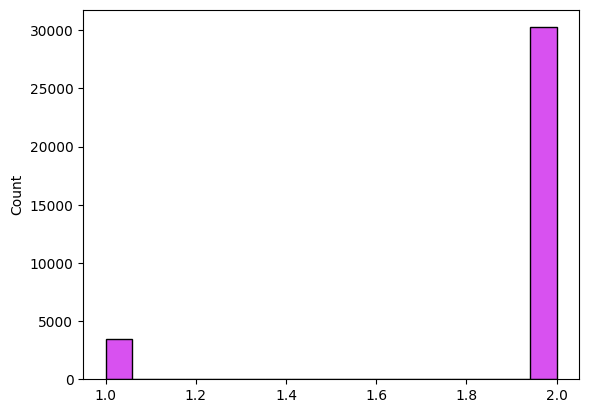

In [130]:
sns.histplot(mp_data['Rent_Rate_Available_Rural'])

In [131]:
display(mp_data['Rent_Rate_Available_Rural'].describe())

statistic,value
str,f64
"""count""",33704.0
"""null_count""",22716.0
"""mean""",1.897342
"""std""",0.303517
"""min""",1.0
"""25%""",2.0
"""50%""",2.0
"""75%""",2.0
"""max""",2.0


In [132]:
mp_data = mp_data.with_columns(
    pl.col('Rent_Rate_Available_Rural').fill_null(value=2)
)

<Axes: ylabel='Count'>

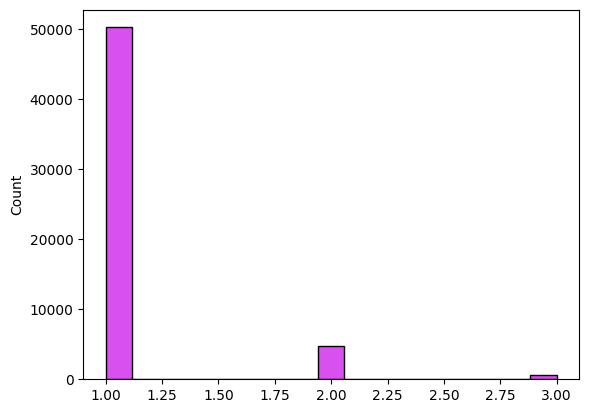

In [133]:
sns.histplot(mp_data['Type_of_Dwelling_Unit'])

In [134]:
mp_data['Type_of_Dwelling_Unit'].describe()

statistic,value
str,f64
"""count""",55600.0
"""null_count""",820.0
"""mean""",1.105468
"""std""",0.337938
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",3.0


In [135]:
mp_data = mp_data.with_columns(
    pl.col('Type_of_Dwelling_Unit').fill_null(strategy='one')
)

In [136]:
mp_data.height

56420

In [137]:
mp_data['Total_Area_Land_Owned_Acres'].describe()

statistic,value
str,f64
"""count""",0.0
"""null_count""",56420.0


<Axes: ylabel='Count'>

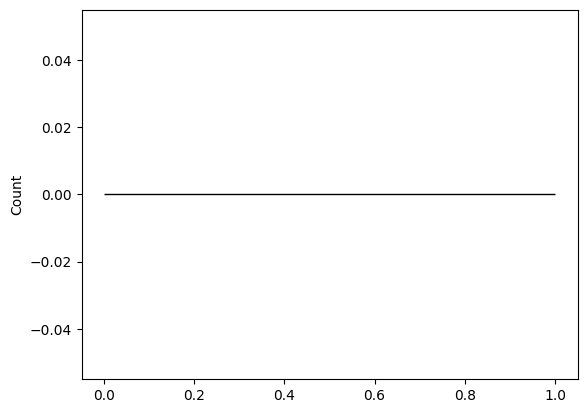

In [138]:
sns.histplot(mp_data['Total_Area_Land_Owned_Acres'])

In [139]:
# No data in this feature better to delete
# I think may be govt survey so black land no one interest to say to surrey guy
#mp_data = mp_data.drop(pl.col('Total_Area_Land_Owned_Acres'))

Rent_Rate_Available_Rural contains : 2


Rent_Rate_Available_Rural
i32
1
2


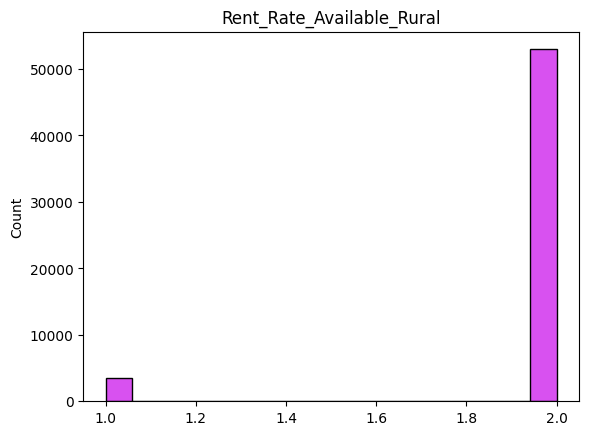

Rent_Rate_Available_Rural contains : 2


Rent_Rate_Available_Rural
i32
1
2


In [140]:
check_unique('Rent_Rate_Available_Rural')

plot_hist('Rent_Rate_Available_Rural')

mp_data = mp_data.with_columns(
    pl.col('Rent_Rate_Available_Rural').fill_null(value=3)
)

check_unique('Rent_Rate_Available_Rural')

Type_of_Dwelling_Unit contains : 3


Type_of_Dwelling_Unit
i32
1
2
3


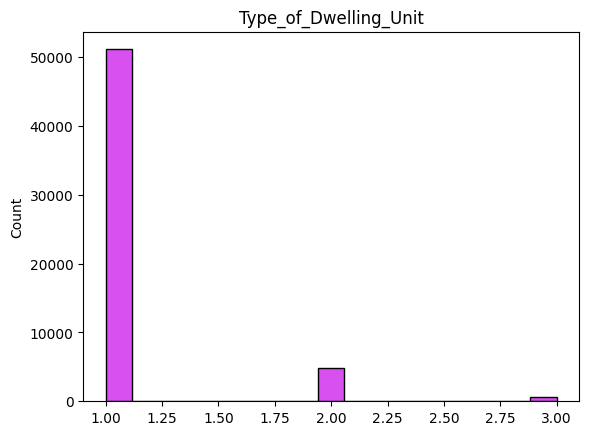

Type_of_Dwelling_Unit contains : 3


Type_of_Dwelling_Unit
i32
1
2
3


In [141]:
check_unique('Type_of_Dwelling_Unit')

plot_hist('Type_of_Dwelling_Unit')

mp_data = mp_data.with_columns(
    pl.col('Type_of_Dwelling_Unit').fill_null(value=3)
)

check_unique('Type_of_Dwelling_Unit')

Type_of_Land_Owned
i32
null
1
2
3


Type_of_Land_Owned
i32
1
2
3


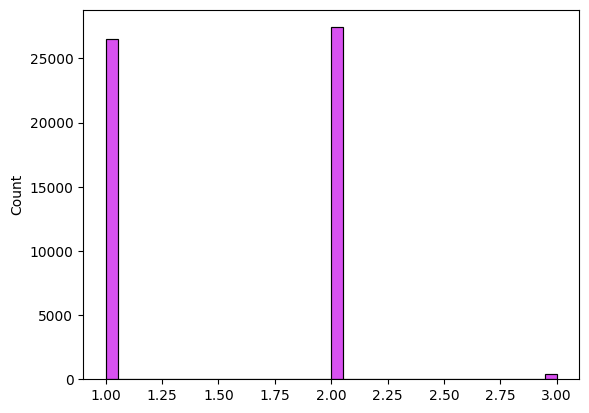

In [142]:
# Just to support the 3 😁

display(mp_data['Type_of_Land_Owned'].unique())
sns.histplot(mp_data['Type_of_Land_Owned'])

mp_data = mp_data.with_columns(
    pl.col('Type_of_Land_Owned').fill_null(value=3)
)

display(mp_data['Type_of_Land_Owned'].unique())

In [143]:
mp_data[lev_03_hh].columns

['FSU_Serial_No',
 'HH_Size_FDQ',
 'Household_Type',
 'Religion_of_HH_Head',
 'Land_Ownership',
 'Type_of_Land_Owned',
 'Total_Area_Land_Owned_Acres',
 'Energy_Source_Cooking',
 'Energy_Source_Lighting',
 'Dwelling_Unit_Exists',
 'Type_of_Dwelling_Unit',
 'Rent_Rate_Available_Rural',
 'Multiplier']

In [144]:
for col in mp_data[lev_03_hh].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== FSU_Serial_No ========'

FSU_Serial_No contains : 791


FSU_Serial_No
i32
25000
25001
25002
25003
25004
…
44195
44196
44197


None

'-------------------------------------------------'

' ========== HH_Size_FDQ ========'

HH_Size_FDQ contains : 20


HH_Size_FDQ
i32
1
2
3
4
5
…
16
17
18


None

'-------------------------------------------------'

' ========== Household_Type ========'

Household_Type contains : 7


Household_Type
i32
1
2
3
4
5
6
9


None

'-------------------------------------------------'

' ========== Religion_of_HH_Head ========'

Religion_of_HH_Head contains : 7


Religion_of_HH_Head
i32
1
2
3
4
5
7
9


None

'-------------------------------------------------'

' ========== Land_Ownership ========'

Land_Ownership contains : 2


Land_Ownership
i32
1
2


None

'-------------------------------------------------'

' ========== Type_of_Land_Owned ========'

Type_of_Land_Owned contains : 3


Type_of_Land_Owned
i32
1
2
3


None

'-------------------------------------------------'

' ========== Total_Area_Land_Owned_Acres ========'

Total_Area_Land_Owned_Acres contains : 1


Total_Area_Land_Owned_Acres
i32
null


None

'-------------------------------------------------'

' ========== Energy_Source_Cooking ========'

Energy_Source_Cooking contains : 9


Energy_Source_Cooking
i32
1
2
3
4
6
7
9
11
12


None

'-------------------------------------------------'

' ========== Energy_Source_Lighting ========'

Energy_Source_Lighting contains : 5


Energy_Source_Lighting
i32
1
2
5
6
9


None

'-------------------------------------------------'

' ========== Dwelling_Unit_Exists ========'

Dwelling_Unit_Exists contains : 2


Dwelling_Unit_Exists
i32
1
2


None

'-------------------------------------------------'

' ========== Type_of_Dwelling_Unit ========'

Type_of_Dwelling_Unit contains : 3


Type_of_Dwelling_Unit
i32
1
2
3


None

'-------------------------------------------------'

' ========== Rent_Rate_Available_Rural ========'

Rent_Rate_Available_Rural contains : 2


Rent_Rate_Available_Rural
i32
1
2


None

'-------------------------------------------------'

' ========== Multiplier ========'

Multiplier contains : 1421


Multiplier
i32
1913
1983
2250
2400
3000
…
613888
653383
828400


None

'-------------------------------------------------'

## Finance

In [145]:
summary(lev_03_fin)

Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Ration_Card_Type
i32,i32,i32,i32
null,null,null,0
1,null,null,3
1,null,null,2


statistic,Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Ration_Card_Type
str,f64,f64,f64,f64
"""count""",19176.0,1920.0,11812.0,56420.0
"""null_count""",37244.0,54500.0,44608.0,0.0
"""mean""",1.133292,3.941667,5.43041,1.780432
"""std""",0.339898,0.234434,0.495154,1.727886
"""min""",1.0,3.0,5.0,0.0
"""25%""",1.0,4.0,5.0,0.0
"""50%""",1.0,4.0,5.0,2.0
"""75%""",1.0,4.0,6.0,2.0
"""max""",2.0,4.0,6.0,9.0


Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Ration_Card_Type
u32,u32,u32,u32
37244,54500,44608,0


Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Ration_Card_Type
f64,f64,f64,f64
0.660121,0.96597,0.790642,0.0


In [146]:
mp_data['Self_Employment_Source_Sector'].describe()

statistic,value
str,f64
"""count""",19176.0
"""null_count""",37244.0
"""mean""",1.133292
"""std""",0.339898
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",2.0


<Axes: ylabel='Count'>

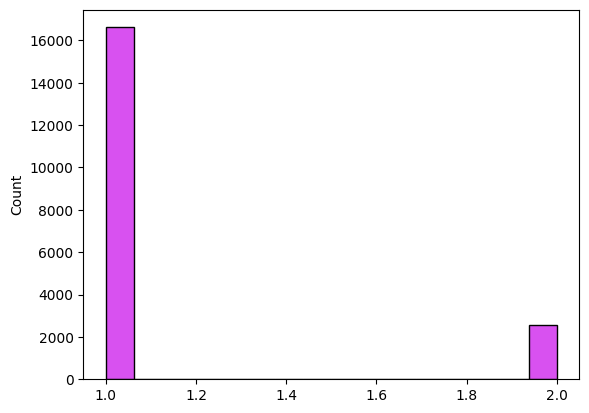

In [147]:
sns.histplot(mp_data['Self_Employment_Source_Sector'])

In [148]:
mp_data = mp_data.with_columns(
    pl.col('Self_Employment_Source_Sector').fill_null(value=1)
)

In [149]:
mp_data['Casual_Labour_Source_Sector'].describe(percentiles=[0.5, 0.65, 0.75, 0.85, 0.95]).to_pandas()

,statistic,value
0,count,11812.000000
1,null_count,44608.000000
2,mean,5.430410
3,std,0.495154
4,min,5.000000
5,50%,5.000000
6,65%,6.000000
7,75%,6.000000
8,85%,6.000000
9,95%,6.000000


<Axes: ylabel='Count'>

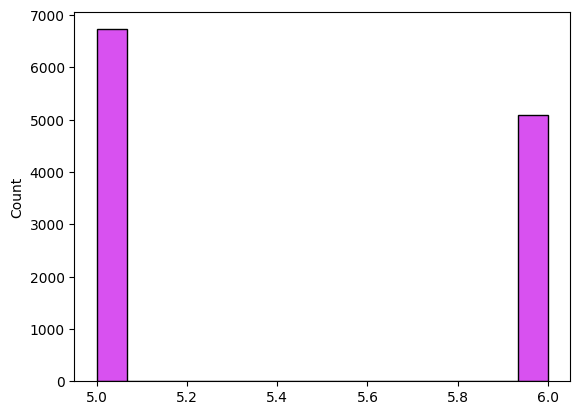

In [150]:
sns.histplot(mp_data['Casual_Labour_Source_Sector'])

In [151]:
mp_data = mp_data.with_columns(
    pl.col('Casual_Labour_Source_Sector').fill_null(value=6)
)

In [152]:
mp_data['Regular_Wage_Source_Sector'].describe()

statistic,value
str,f64
"""count""",1920.0
"""null_count""",54500.0
"""mean""",3.941667
"""std""",0.234434
"""min""",3.0
"""25%""",4.0
"""50%""",4.0
"""75%""",4.0
"""max""",4.0


<Axes: ylabel='Count'>

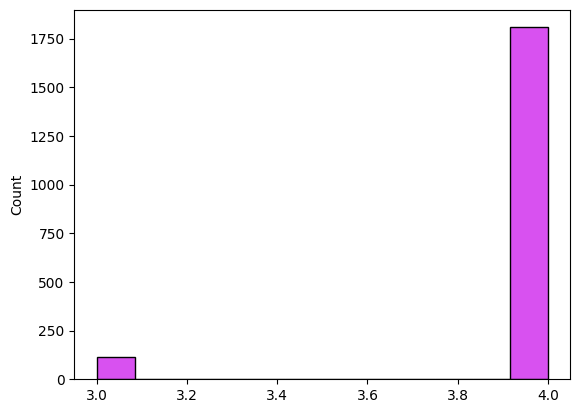

In [153]:
sns.histplot(mp_data['Regular_Wage_Source_Sector'])

In [154]:
mp_data = mp_data.with_columns(
    pl.col('Regular_Wage_Source_Sector').fill_null(value=4)
)

In [155]:
mp_data[lev_03_fin].columns

['Self_Employment_Source_Sector',
 'Regular_Wage_Source_Sector',
 'Casual_Labour_Source_Sector',
 'Ration_Card_Type']

In [156]:
for col in mp_data[lev_03_fin].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== Self_Employment_Source_Sector ========'

Self_Employment_Source_Sector contains : 2


Self_Employment_Source_Sector
i32
1
2


None

'-------------------------------------------------'

' ========== Regular_Wage_Source_Sector ========'

Regular_Wage_Source_Sector contains : 2


Regular_Wage_Source_Sector
i32
3
4


None

'-------------------------------------------------'

' ========== Casual_Labour_Source_Sector ========'

Casual_Labour_Source_Sector contains : 2


Casual_Labour_Source_Sector
i32
5
6


None

'-------------------------------------------------'

' ========== Ration_Card_Type ========'

Ration_Card_Type contains : 7


Ration_Card_Type
i32
0
1
2
3
4
5
9


None

'-------------------------------------------------'

## Occupation & Schemes

In [157]:
summary(lev_03_occupation)

Engaged_in_Economic_Activity_Las,Max_Income_Activity
i32,i32
1,2
1,3
1,2


statistic,Engaged_in_Economic_Activity_Las,Max_Income_Activity
str,f64,f64
"""count""",56420.0,53172.0
"""null_count""",0.0,3248.0
"""mean""",1.057568,1.754984
"""std""",0.232927,0.87111
"""min""",1.0,1.0
"""25%""",1.0,1.0
"""50%""",1.0,1.0
"""75%""",1.0,3.0
"""max""",2.0,3.0


Engaged_in_Economic_Activity_Las,Max_Income_Activity
u32,u32
0,3248


Engaged_in_Economic_Activity_Las,Max_Income_Activity
f64,f64
0.0,0.057568


In [158]:
mp_data['Max_Income_Activity'].describe(percentiles=[0.5, 0.65, 0.75, 0.85, 0.95]).to_pandas()

,statistic,value
0,count,53172.000000
1,null_count,3248.000000
2,mean,1.754984
3,std,0.871110
4,min,1.000000
5,50%,1.000000
6,65%,2.000000
7,75%,3.000000
8,85%,3.000000
9,95%,3.000000


<Axes: ylabel='Count'>

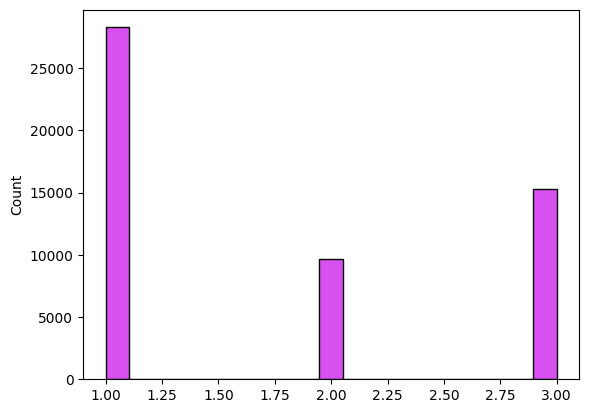

In [159]:
sns.histplot(mp_data['Max_Income_Activity'])

In [160]:
mp_data = mp_data.with_columns(
    pl.col('Max_Income_Activity').fill_null(value=2)
)

In [161]:
for col in mp_data[lev_03_occupation].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== Engaged_in_Economic_Activity_Las ========'

Engaged_in_Economic_Activity_Las contains : 2


Engaged_in_Economic_Activity_Las
i32
1
2


None

'-------------------------------------------------'

' ========== Max_Income_Activity ========'

Max_Income_Activity contains : 3


Max_Income_Activity
i32
1
2
3


None

'-------------------------------------------------'

([<matplotlib.patches.Wedge at 0x22de31122d0>,
 [Text(1.0626081904749292, 0.2843656687007012, ''),
  Text(0.892217149067371, 0.6433883422242689, ''),
  Text(-0.15299623156216027, 1.0893081075287092, ''),
  Text(-0.5776961313262649, -0.9360914377616468, ''),
  Text(0.9060469925407538, -0.6237618514367926, ''),
  Text(0.9824046249073577, -0.4948546786286191, ''),
  Text(1.0796010747676568, -0.21085900350831718, '')])

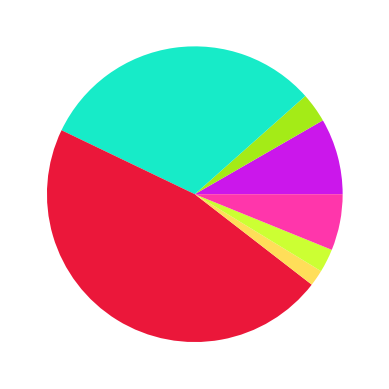

In [162]:
plt.pie(
    mp_data['Ration_Card_Type'].value_counts()['count']
)

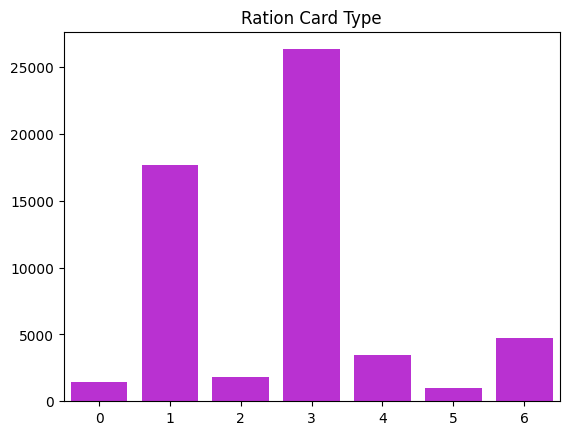

In [163]:
sns.barplot(mp_data['Ration_Card_Type'].value_counts()['count'])
plt.title('Ration Card Type')
plt.show()


| Value | Category                          |
| ----- | --------------------------------- |
| 0     | No ration card                    |
| 1     | Antyodaya Anna Yojana (AAY)       |
| 2     | Below Poverty Line (BPL)          |
| 3     | Above Poverty Line (APL)          |
| 4     | Priority House Holds (PHH)        |
| 5     | State Food Security Scheme (SFSS) |
| 6     | Others                            |

## Schema

In [164]:
summary(lev_03_scheme)

Benefitted_From_PMGKY
i32
1
1
1


statistic,Benefitted_From_PMGKY
str,f64
"""count""",56420.0
"""null_count""",0.0
"""mean""",1.495073
"""std""",0.49998
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",2.0
"""max""",2.0


Benefitted_From_PMGKY
u32
0


Benefitted_From_PMGKY
f64
0.0


<Axes: ylabel='Count'>

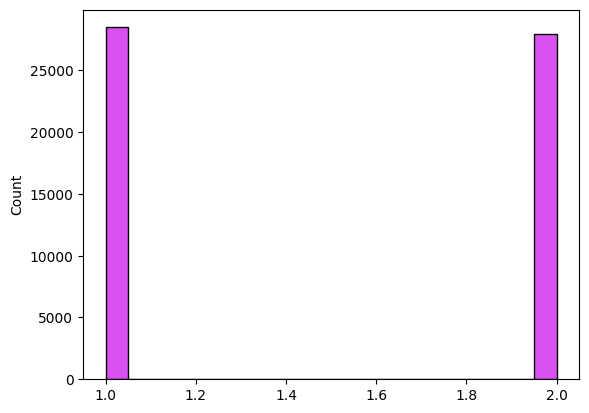

In [165]:
sns.histplot(mp_data['Benefitted_From_PMGKY'])

# Saving 

In [166]:
mp_data.write_csv(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.csv")
mp_data.write_parquet(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.parquet", compression="zstd")
print('Saved 🙌')

Saved 🙌
